## Data Mining project preprocessing

In [2]:
import sys
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim(user_agent="Optima")
import json
import pandas as pd
import requests
import csv
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import os
import re


!C:/Users/sdk19/anaconda3/python -m pip install wordcloud
!C:/Users/sdk19/anaconda3/python -m pip install gensim
!C:/Users/sdk19/anaconda3/python -m pip install spacy    
    
from wordcloud import WordCloud
import gensim
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from IPython.display import HTML, display
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')# to ignore the warnings

Lets observe the train data first

In [6]:
df=pd.read_csv("C:\\Users\\sdk19\\OneDrive\\Desktop\\umd sem2\\data mining\\project\\airbnbTrain.csv")
pd.set_option('display.max_columns', 66) # to display all the columns of dataframe
df.head()

,id,high_booking_rate,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,extra_people,guests_included,host_about,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,instant_bookable,interaction,is_business_travel_ready,is_location_exact,latitude,longitude,market,maximum_nights,minimum_nights,monthly_price,neighborhood_overview,neighbourhood,notes,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,security_deposit,space,square_feet,state,transit,weekly_price,zipcode,{randomControl}
0,1060760,0,NaN,4,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",19,67,29,29,2.0,Real Bed,2.0,3.0,strict_14_with_grace_period,Hallandale Beach,$140.00,Enjoy an amazing water view from this beautifu...,$0.00,1,NaN,NaN,True,False,False,9.0,"Miami, Florida, United States",NaN,0.95,within an hour,43538.0,"['email', 'phone', 'offline_government_id', 'g...",NaN,True,I am totally available via text or phone to ma...,False,True,25.98676,-80.12252,Miami,30,1,NaN,NaN,NaN,The Beachwalk Resort asks $100 for deposit.,$199.00,Serviced apartment,False,False,False,10.0,9.0,9.0,10.0,10.0,90.0,10.0,Entire home/apt,NaN,The apartment is located at the Beachwalk Reso...,NaN,FL,NaN,NaN,33009,113890
1,1040685,0,NaN,4,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0,0,0,0,1.0,Real Bed,2.0,2.0,strict_14_with_grace_period,New York,$30.00,A New York charmer on the edge of Times Square...,$0.00,4,"Hello! It's me! I grew up in Utah, I had a hum...",NaN,True,False,False,1.0,"New York, New York, United States",Hell's Kitchen,NaN,NaN,41807.0,"['email', 'phone', 'reviews']",Please remember that this is our home. We are ...,False,NaN,False,True,40.76198,-73.98718,New York,14,2,NaN,NaN,Midtown,This is on the 5th floor of a walk up. The fir...,$350.00,Apartment,False,False,False,10.0,10.0,9.0,10.0,10.0,98.0,9.0,Entire home/apt,NaN,You will not find a more adorable apartment! A...,NaN,NY,This apartment is in one of the best locations...,NaN,10019,116337
2,1001074,0,NaN,4,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",0,0,0,0,1.0,Real Bed,2.0,2.0,moderate,Los Angeles,$125.00,Charming & private 2 bedroom attached guest ho...,$0.00,3,"My partner, Art Toye and I live in Los Angeles...",NaN,True,True,True,3.0,"Los Angeles, California, United States",Mar Vista,1.00,within an hour,41637.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",NaN,True,"We are usually at home, available to answer qu...",False,True,34.00697,-118.45050,Los Angeles,29,2,NaN,You probably will be surprised that such a cal...,Mar Vista,NaN,$125.00,House,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,$200.00,NaN,NaN,CA,NaN,NaN,90066,112297
3,1197330,0,NaN,2,"{Wifi,""Air conditioning"",""Free parking on prem...",24,173,54,84,2.5,Real Bed,1.0,1.0,moderate,Lino Lakes,NaN,Quiet Neighborhood I work mondays - Fridays bu...,$0.00,1,NaN,NaN,True,False,False,0.0,"Akron, Ohio, United States",NaN,NaN,NaN,43119.0,"['email', 'phone']",NaN,True,I work mondays - Fridays but I’m home most of ...,False,True,45.18900,-93.13541,Minneapolis,1125,2,NaN,NaN,NaN,NaN,$35.00,Townhouse,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NaN,NaN,NaN,MN,"House is 24 mins from downtown, it’s a quiet s...",NaN,55014,125404
4,1031737,0,Access the entire house. Garage will be locked.,2,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",4,64,34,64,1.0,Real Bed,1.0,1.0,strict_14_with_grace_period,Long Beach,NaN,Once you get unpacked and settled in you'll pr...,$0.00,1,My personal mission: To enrich live

### Observations:
1. There are 66 columns in the data.
2. Dependent variable is high_booking_rate
3. Some of the columns has NA values in it. (eg.access, host columns etc.)
4. Some columns clearly needs cleaning to be used in the model such as price ,cleaning fee etc. which has $ sign on them

Looking at missing data.

In [11]:
dfNA=df.isnull().sum()/len(df)*100
dfNA.to_frame().T

,id,high_booking_rate,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,extra_people,guests_included,host_about,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,instant_bookable,interaction,is_business_travel_ready,is_location_exact,latitude,longitude,market,maximum_nights,minimum_nights,monthly_price,neighborhood_overview,neighbourhood,notes,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,security_deposit,space,square_feet,state,transit,weekly_price,zipcode,{randomControl}
0,0.0,0.0,40.35715,0.0,0.0,0.0,0.0,0.0,0.0,0.06135,0.0,0.107528,0.155684,0.0,0.083779,13.821583,1.985632,0.0,0.0,35.199784,100.0,0.662977,0.662977,0.662977,0.662977,0.896503,26.472237,20.052247,20.052247,0.662977,0.0,31.075474,0.0,34.658188,0.0,0.0,0.0,0.0,0.157003,0.0,0.0,92.353667,32.076206,18.576546,48.518032,0.0,0.0,0.0,0.0,0.0,20.348442,20.37285,20.341845,20.344484,20.376149,20.313479,20.384065,0.0,24.650205,22.543852,98.977498,0.031005,35.774364,91.370086,1.143882,0.0


access,host_about,host_acceptance_rate,host_neighbourhood,house_rules,interaction,monthly_price,
neighborhood_overview,neighbourhood,notes,space,square_feet,transit,state,weekly_price,zipcode,
randomControl this columns are unusable according to above statistics and common sense. some of the columns are removed for reason different than lot of missing values in them.They are listed below along with reason for their removal.

1. host_neighbourhood: too much noise and unexplainable characters in this column so it is difficult and time consuming to clean. Almost same information is conveyed by other host related much cleaner columns.
2. house_rules: same problem as host_neighbourhood and too many missing values to impute for a text feature.
3. neighbourhood: This column is not reliable. From the initial observation of this feature I found that name of the same neighourhoods are written in multiple ways.
4. space: same information is conveyed from columns such as accommodates, bedrooms, beds, which are much cleaner and easier to use in the model.
5. state: too many catogories in this, same information is conveyed by market column.
6. zipcode: same information is conveyed by market column.
7. randomControl: We were not allowed to use this in our model, since it was for the second part of the project which was business case for my groups assigned market.

### 1.host_response_time

In [4]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")
df.host_response_time.value_counts()


Null values: 30397
Proportion: 20.1%


within an hour        89709
within a few hours    19773
within a day           9625
a few days or more     2085
Name: host_response_time, dtype: int64

20 % data is missing in this column. I have replaced it with category unknown.

In [5]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.591791
unknown               0.200522
within a few hours    0.130438
within a day          0.063494
a few days or more    0.013754
Name: host_response_time, dtype: float64

### 2.host_response_rate

In [12]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")


Null values: 30397
Proportion: 20.1%


0.9570380058090135
1.0


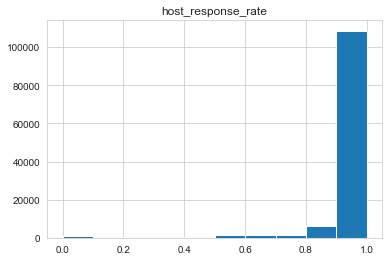

In [19]:
print(df.host_response_rate.mean())
print(df.host_response_rate.median())
df['host_response_rate'].hist(bins=10).set_title('host_response_rate')
plt.show()

This columns has skewed distribution. Thus i have created bins of categories accordingly and have added unknown category for missing values.

In [20]:
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 0.8, 0.95, 0.99, 1], 
                               labels=['0-80%', '80-95%', '95-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       88893
unknown    30397
80-95%     12772
95-99%     11261
0-80%       8266
Name: host_response_rate, dtype: int64

### 3.Host related other columns

In [55]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,[ 'host_is_superhost', 'host_listings_count', 
                  'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 4])

1005

Replacing missing values with unknown category not applicable for host_listing_count since it is numeric column.

In [21]:
for col in ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified']:
    df[col].fillna('Unknown', inplace=True)

In [23]:
df.host_identity_verified.value_counts()

False      85107
True       65477
Unknown     1005
Name: host_identity_verified, dtype: int64

### 4.property type
Considering only top few property types

In [24]:
pd.options.display.max_rows = 100
df.property_type.value_counts()

Apartment                 60376
House                     42673
Condominium               18161
Townhouse                  6437
Guest suite                5722
Guesthouse                 3565
Loft                       2425
Bungalow                   1946
Serviced apartment         1875
Villa                      1438
Boutique hotel             1081
Cottage                    1017
Resort                      757
Hotel                       711
Bed and breakfast           668
Other                       465
Hostel                      418
Camper/RV                   381
Aparthotel                  298
Tiny house                  276
Cabin                       268
Farm stay                   125
Boat                         86
Tent                         61
Earth house                  38
Castle                       34
Yurt                         30
Treehouse                    29
Campsite                     29
Dome house                   28
Houseboat                    25
Chalet  

In [59]:
df.property_type.replace({
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House',  
    'Resort':'Hotel',
    'Boutique hotel':'Hotel',
    'Guesthouse':'Guest suite',
    'Bungalow':'House',
    
    
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment','Hotel','Guest suite','Condominium','Townhouse']), 'property_type'] = 'Other'

### 5. bathrooms,bedrooms,beds
Replacing missing values with median

In [60]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

### 6. Security deposit, Cleaning Fee, Extra people

Having missing values in security deposit and cleaning fee is equivalent to zero, thus replacing missing with zero.

In [61]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.isna().sum()
df.security_deposit.value_counts()
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')
df.security_deposit.describe()

count    151589.000000
mean        231.353779
std        1083.787204
min           0.000000
25%           0.000000
50%           0.000000
75%         250.000000
max      250000.000000
Name: security_deposit, dtype: float64

In [62]:
df.cleaning_fee.isna().sum()
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')
df.cleaning_fee.describe()

count    151589.000000
mean         81.836617
std          97.313879
min           0.000000
25%          20.000000
50%          59.000000
75%         105.000000
max        3383.000000
Name: cleaning_fee, dtype: float64

In [63]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')
df.extra_people.describe()

count    151589.000000
mean         13.392205
std          25.076080
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max         500.000000
Name: extra_people, dtype: float64

### 7. Review Scores Features

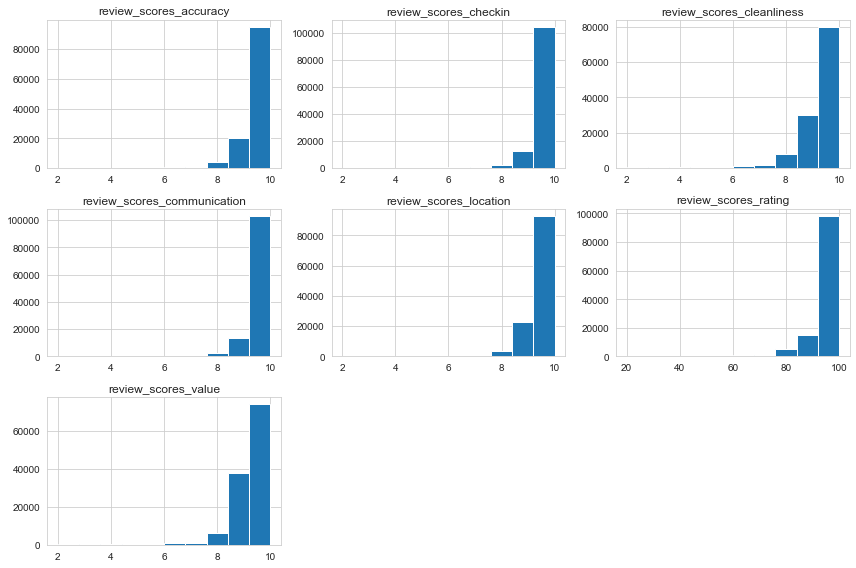

In [8]:
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

From above plots of review scores features we can see that most of these features has skewed distribution and we know from observation of missing data that there are missing values in these features. To mitigate affect of these on the model I have binned these features except review scores rating into 4 bins starting from 0 to 8 and no reviews for missing values.
Review scores rating is left out beacuse it has different range of 0 to 100 thus it is binned differently.

In [9]:
variables_to_plot.pop(5)

'review_scores_rating'

In [10]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['low', 'medium', 'high'],
               na_label='no reviews')

In [13]:
df.review_scores_value.value_counts()

high      73953
medium    37633
nan       30900
low        9103
Name: review_scores_value, dtype: int64

In [14]:
df_review=df[['id','review_scores_value']]
df_review.to_csv('review_value.csv')

In [68]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 90 ,95,98, 100],
           labels=['bad', 'low','moderate','good' ,'very_good'],
           na_label='no reviews')

In [69]:
df.review_scores_rating.value_counts()

very_good    45011
good         31563
nan          30793
moderate     24568
low          13024
bad           6630
Name: review_scores_rating, dtype: int64

In [70]:

df.cancellation_policy.value_counts()

strict_14_with_grace_period    67315
moderate                       40474
flexible                       37767
super_strict_60                 3313
super_strict_30                 1768
strict                           787
luxury_moderate                  115
luxury_super_strict_95            37
luxury_super_strict_125            7
luxury_no_refund                   6
Name: cancellation_policy, dtype: int64

In [72]:
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate',
    'luxury_super_strict_95':'other',
    'luxury_super_strict_125':'other',
    'luxury_no_refund':'other'
    }, inplace=True)

### 8. Market
I have only used top few markets , rest are placed into others. Some markets were merged together to make better sense out of them eg. maui and Oahu both are islands of Hawai thus they are kept under The big island.

In [73]:
df.market.value_counts()

New York                                                 32143
Los Angeles                                              23069
San Diego                                                 8083
Austin                                                    6733
Las Vegas                                                 6207
D.C.                                                      5452
Seattle                                                   5399
Miami                                                     5151
Chicago                                                   5117
San Francisco                                             5106
Maui                                                      4649
Nashville                                                 4429
Oahu                                                      4296
Minneapolis                                               4001
New Orleans                                               3907
South Bay, CA                                          

In [74]:
df.market.replace({
    'South Bay CA': 'South Bay, CA',
    'East Bay CA': 'East Bay, CA',
    'Texas - Austin': 'Austin',
    'Maui': 'The Big Island',
    'Oahu': 'The Big Island',
    'Kauai': 'The Big Island',  
    'Big Island':'The Big Island',
    
    
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.market.isin(['New York', 'Los Angeles','San Diego','Austin','Las Vegas','D.C.','Seattle','Seattle','Miami','Chicago','San Francisco','Nashville','Minneapolis','New Orleans','South Bay, CA','The Big Island','Denver','Boston','Portland','Providence','East Bay, CA']), 'market'] = 'Other'

In [75]:
df.market.value_counts()

New York          32143
Los Angeles       23069
The Big Island    14185
San Diego          8083
Austin             6746
Las Vegas          6207
Other              5472
D.C.               5452
Seattle            5399
Miami              5151
Chicago            5117
San Francisco      5106
South Bay, CA      4530
Nashville          4429
Minneapolis        4001
New Orleans        3907
Denver             2916
Boston             2863
Portland           2863
East Bay, CA       1999
Providence         1951
Name: market, dtype: int64

In [5]:
df.to_csv('aribnbTestPython.csv')

df.head()

,id,high_booking_rate,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,...,review_scores_value,room_type,security_deposit,space,square_feet,state,transit,weekly_price,zipcode,{randomControl}
0,1060760,0,NaN,4,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",19,67,29,29,2.0,...,10.0,Entire home/apt,NaN,The apartment is located at the Beachwalk Reso...,NaN,FL,NaN,NaN,33009,113890
1,1040685,0,NaN,4,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",0,0,0,0,1.0,...,9.0,Entire home/apt,NaN,You will not find a more adorable apartment! A...,NaN,NY,This apartment is in one of the best locations...,NaN,10019,116337
2,1001074,0,NaN,4,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",0,0,0,0,1.0,...,NaN,Entire home/apt,$200.00,NaN,NaN,CA,NaN,NaN,90066,112297
3,1197330,0,NaN,2,"{Wifi,""Air conditioning"",""Free parking on prem...",24,173,54,84,2.5,...,NaN,Private room,NaN,NaN,NaN,MN,"House is 24 mins from downtown, it’s a quiet s...",NaN,55014,125404
4,1031737,0,Access the entire house. Garage will be locked.,2,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",4,64,34,64,1.0,...,10.0,Private room,NaN,Once you get here - you'll see. I won't be sur...,NaN,CA,Just outside the front door you will find publ...,NaN,90803,112921


This is all for this notebook, For NLP using LDA and HDPA model refer to aibnbFeatureEngineering3, for other datapreprocessing on airbnb data before this one in R refer to airbnbFeatureEngineering1.